In [25]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [26]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"

# tags = ['2024-04-12-15-31-26']
# filters = {"tags": {"$in": tags}}
tags = ["2024-05-21-10-40-41", "2024-05-21-11-11-16"
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [27]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

# filter out runs with Evaluation/Mean_Returns == -100
df = df[df['Evaluation/Mean_Returns'] != -100]

ncols, nrows = df["ncols"][0], 6
df

100%|██████████| 12/12 [00:00<00:00, 46517.23it/s]


,Evaluation/Entropies,Evaluation/Mean_Entropy,Evaluation/Mean_Returns,Evaluation/Mean_Discounted_Returns,Evaluation/Timesteps,_wandb,Evaluation/Returns,_runtime,_timestamp,trajectories,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.994515,-99.080002,-99.080002,"{'_type': 'histogram', 'bins': [26, 27.15625, ...",{'runtime': 410},"{'_type': 'histogram', 'bins': [-100, -98.8437...",411.999037,1.716282e+09,"[[60, 48, 36, 24, 36, 36, 24, 25, 26, 27, 28, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
1,"{'values': [1, 0, 1, 1, 1, 0, 0, 0, 1, 3, 1, 1...",0.665805,-24.850000,-24.850000,"{'values': [7, 0, 2, 0, 0, 15, 0, 5, 0, 0, 18,...",{'runtime': 104},"{'_type': 'histogram', 'bins': [-44, -43.60937...",105.959580,1.716281e+09,"[[60, 48, 36, 24, 12, 13, 14, 15, 16, 17, 18, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
2,"{'_type': 'histogram', 'bins': [0.473359465599...",0.582897,-27.879999,-27.879999,"{'_type': 'histogram', 'bins': [21, 21.34375, ...",{'runtime': 113},"{'bins': [-43, -42.65625, -42.3125, -41.96875,...",114.807848,1.716281e+09,"[[60, 48, 36, 24, 24, 24, 24, 12, 12, 13, 14, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
3,"{'values': [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1...",0.988916,-35.509998,-35.509998,"{'values': [7, 2, 3, 3, 4, 3, 5, 3, 11, 7, 4, ...",{'runtime': 78},"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0...",79.979197,1.716281e+09,"[[60, 48, 36, 37, 36, 36, 24, 25, 26, 27, 28, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
4,"{'bins': [0.6384758949279785, 0.64091652631759...",0.718257,-23.530001,-23.530001,"{'_type': 'histogram', 'values': [2, 0, 0, 1, ...",{'runtime': 50},"{'_type': 'histogram', 'bins': [-35, -34.71875...",51.547072,1.716281e+09,"[[60, 48, 36, 24, 24, 24, 36, 24, 36, 36, 36, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
5,"{'_type': 'histogram', 'bins': [0.563988506793...",0.661471,-26.459999,-26.459999,"{'bins': [19, 19.34375, 19.6875, 20.03125, 20....",{'runtime': 53},"{'values': [1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1...",54.552236,1.716281e+09,"[[60, 48, 36, 24, 25, 24, 25, 26, 27, 26, 27, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
6,"{'_type': 'histogram', 'bins': [0.981732904911...",0.990490,-66.519997,-66.519997,"{'values': [1, 1, 0, 1, 1, 0, 3, 0, 4, 0, 1, 1...",{'runtime': 65},"{'bins': [-100, -98.875, -97.75, -96.625, -95....",66.468504,1.716281e+09,"[[60, 48, 36, 48, 48, 48, 48, 48, 36, 37, 36, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
7,"{'values': [1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1...",0.767418,-20.709999,-20.709999,"{'values': [25, 0, 0, 0, 11, 0, 0, 0, 16, 0, 0...",{'runtime': 22},"{'bins': [-33, -32.75, -32.5, -32.25, -32, -31...",23.495530,1.716281e+09,"[[60, 48, 36, 37, 38, 26, 27, 28, 29, 30, 31, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
8,"{'_type': 'histogram', 'bins': [0.617625117301...",0.705351,-22.590000,-22.590000,"{'values': [17, 0, 6, 0, 10, 0, 11, 0, 8, 0, 1...",{'runtime': 23},"{'bins': [-49, -48.5, -48, -47.5, -47, -46.5, ...",24.639931,1.716281e+09,"[[60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
9,"{'_type': 'histogram', 'bins': [0.966813802719...",0.979379,-64.040001,-64.040001,"{'values': [1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0...",{'runtime': 35},"{'_type': 'histogram', 'bins': [-100, -98.8593...",36.624770,1.716281e+09,"[[60, 48, 60, 48, 48, 48, 60, 48, 48, 49, 37, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity


In [28]:
# filter out 128 planning budget
# Assuming 'df' is your DataFrame
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
# Define the policy combination renaming mapping
policy_combination_mapping = {
    'mvc+PolicyUCT': 'MVC+MVCUCT',
    'mvc+UCT': 'MVC+UCT',
    'visit+UCT': 'Visit+UCT'
}

# Rename the policy combinations in the DataFrame
df['policy_combination'] = df['policy_combination'].map(policy_combination_mapping)

# Group the DataFrame by both 'puct_c' and 'planning_budget'
grouped = df.groupby(['puct_c', 'planning_budget'])['trajectories']


# Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()
aggregated_trajectories


puct_c  planning_budget
0.01    16                 [[60, 48, 48, 48, 48, 48, 49, 37, 38, 39, 40, ...
        32                 [[60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, ...
        64                 [[60, 48, 36, 24, 25, 24, 25, 26, 27, 26, 27, ...
        128                [[60, 48, 36, 24, 24, 24, 24, 12, 12, 13, 14, ...
1.00    16                 [[60, 48, 48, 48, 49, 37, 38, 39, 40, 41, 42, ...
        32                 [[60, 48, 36, 37, 38, 26, 27, 28, 29, 30, 31, ...
        64                 [[60, 48, 36, 24, 24, 24, 36, 24, 36, 36, 36, ...
        128                [[60, 48, 36, 24, 12, 13, 14, 15, 16, 17, 18, ...
100.00  16                 [[60, 48, 60, 48, 48, 48, 60, 48, 48, 49, 37, ...
        32                 [[60, 48, 36, 48, 48, 48, 48, 48, 36, 37, 36, ...
        64                 [[60, 48, 36, 37, 36, 36, 24, 25, 26, 27, 28, ...
        128                [[60, 48, 36, 24, 36, 36, 24, 25, 26, 27, 28, ...
Name: trajectories, dtype: object

In [43]:
# remove all trajectories with a length of 100
print(aggregated_trajectories.apply(lambda x: len(x)).sum())
filtered_aggregated_trajectories = aggregated_trajectories.apply(lambda x: [traj for traj in x if len(traj) != 100])
# check the total number of trajectories
filtered_aggregated_trajectories.apply(lambda x: len(x)).sum()

1200


1076

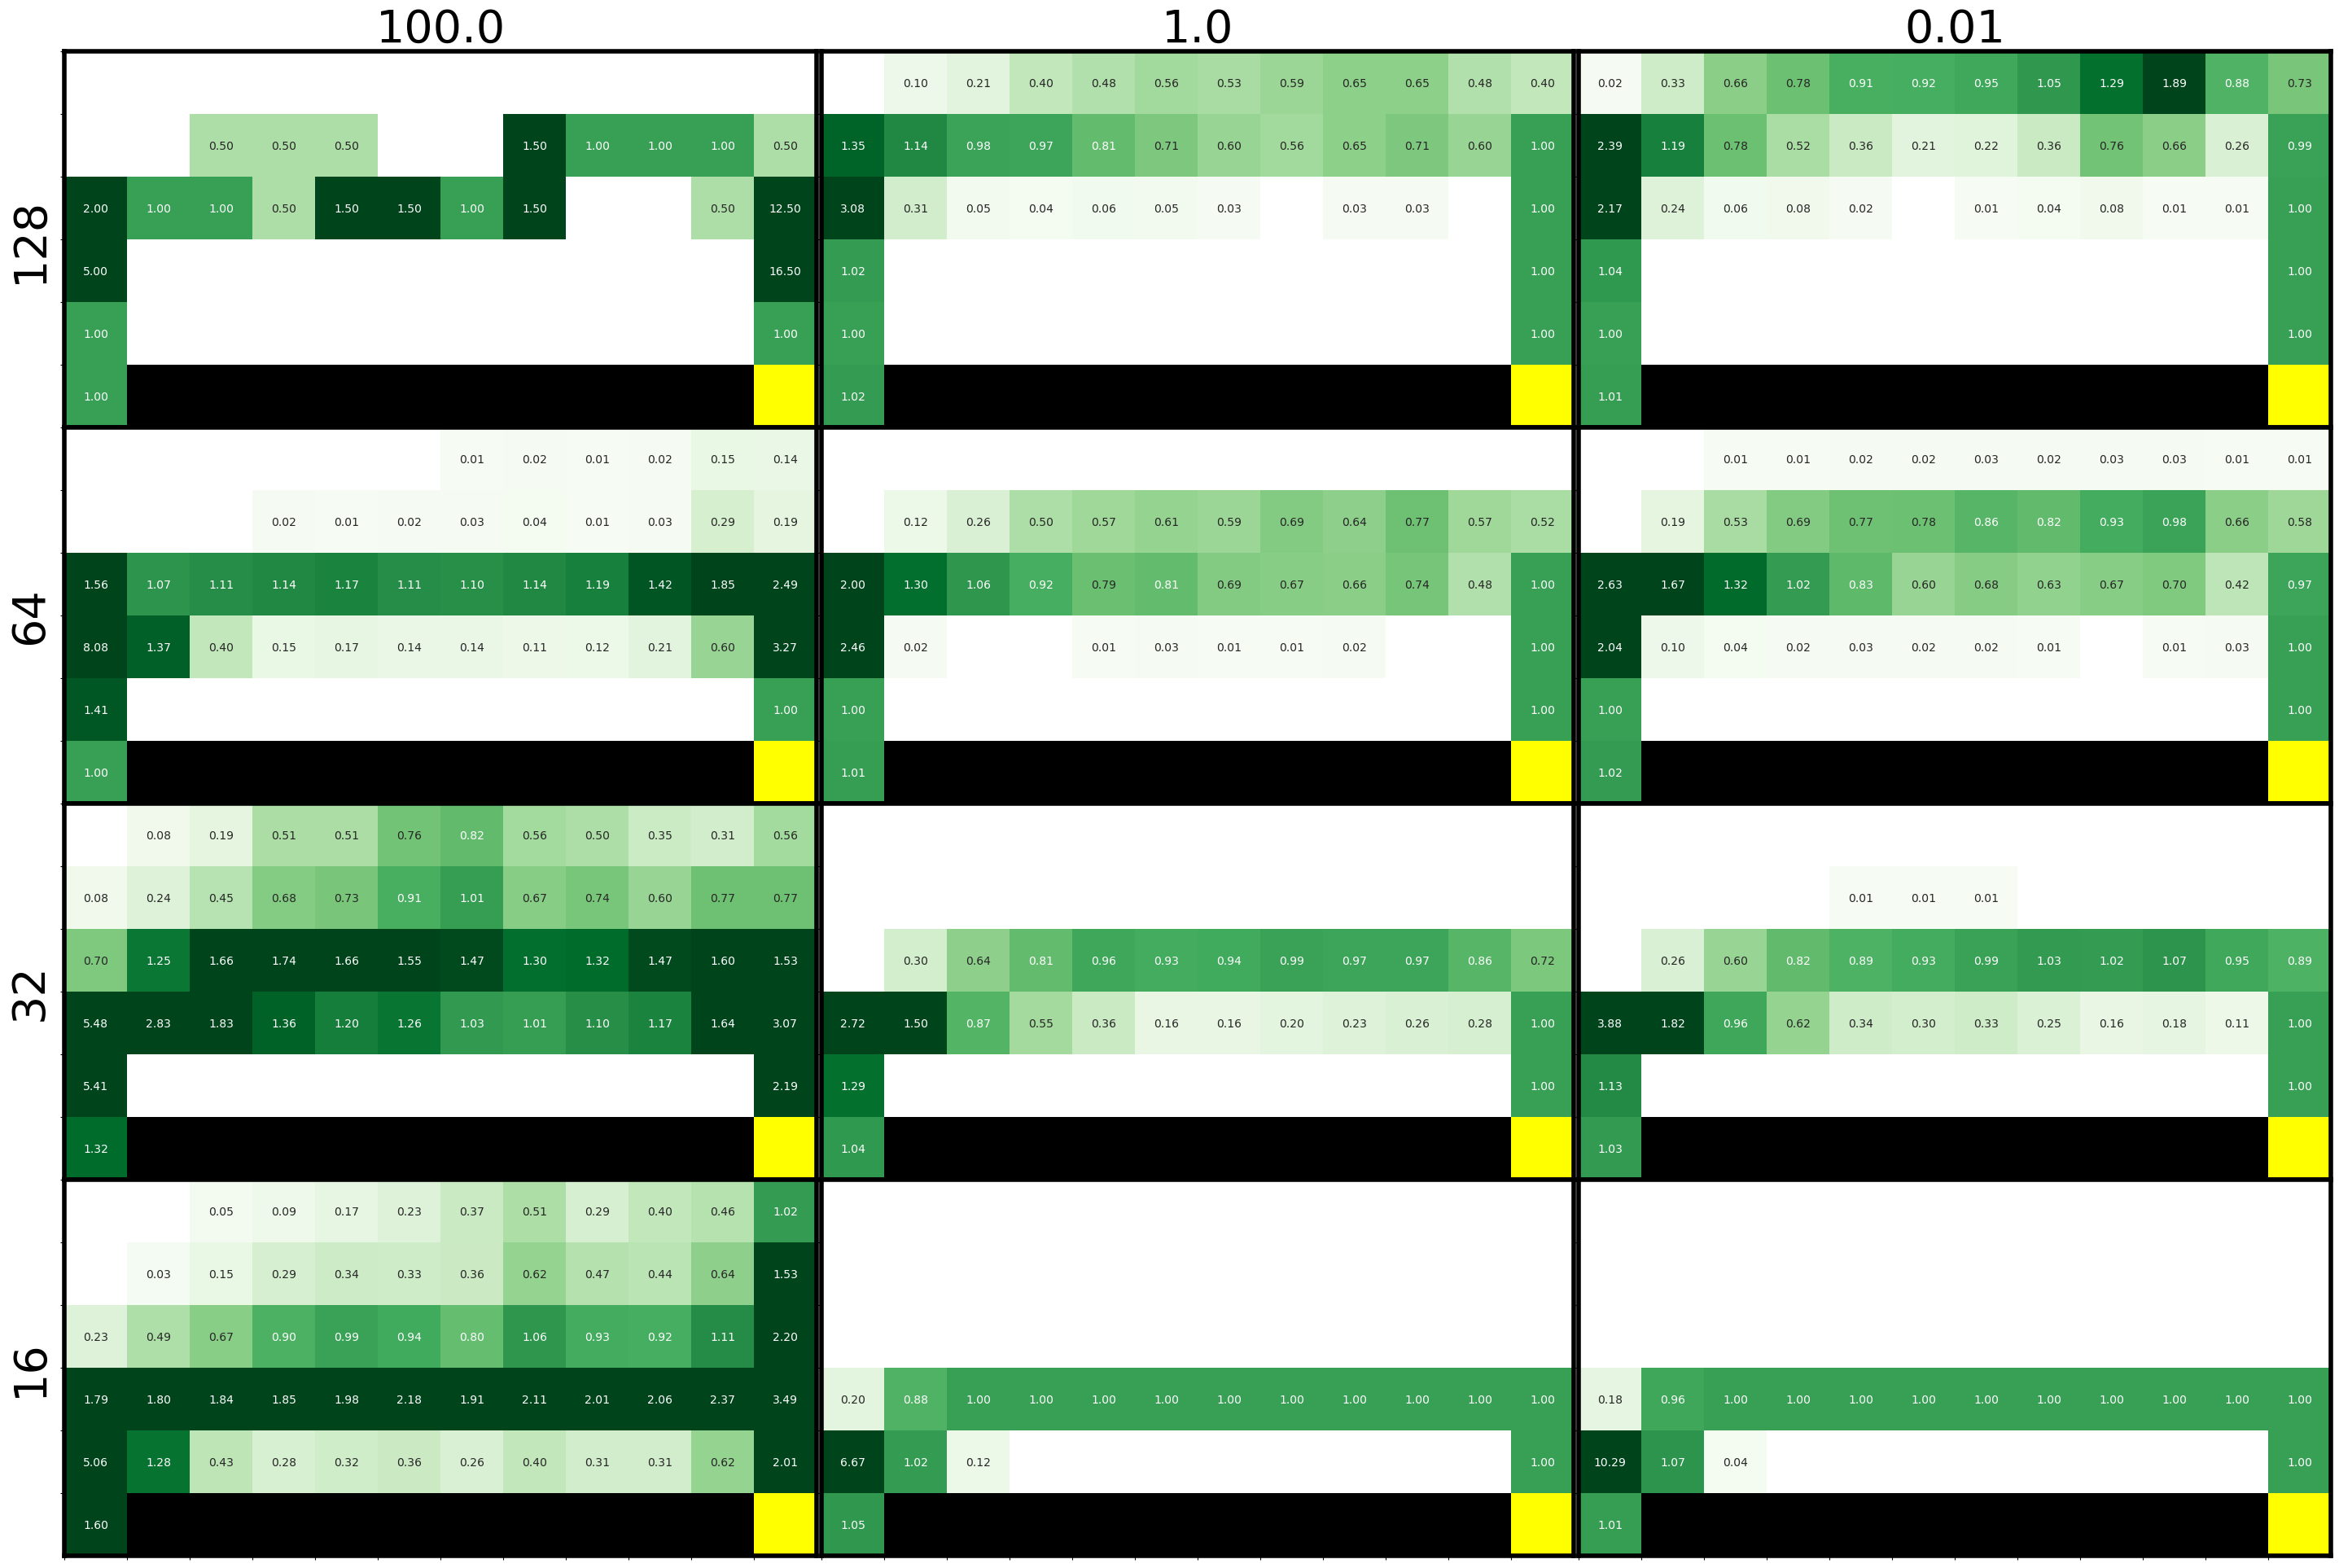

In [44]:

import matplotlib.colors as colors
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density
# Determine the number of unique policy combinations and planning budgets
n_policies = len(df['puct_c'].unique())
n_budgets = len(df['planning_budget'].unique())

# Prepare the plot
fig, axs = plt.subplots(n_budgets, n_policies, figsize=(ncols * n_policies, nrows * n_budgets))

# Cliff and goal state coordinates
cliff_coords = [(nrows - 1, col) for col in range(1, ncols - 1)]
goal_coord = (nrows - 1, ncols - 1)

# Plot each subgroup
for (puct_c, planning_budget), trajectories in filtered_aggregated_trajectories.items():
    i = df['planning_budget'].unique().tolist().index(planning_budget)
    j = df['puct_c'].unique().tolist().index(puct_c)
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)

    # Set cliff and goal states to np.nan to hide their annotations
    for (row, col) in cliff_coords:
        density[row, col] = np.nan  # Remove numbers from the cliff cells
    goal_row, goal_col = goal_coord
    density[goal_row, goal_col] = np.nan  # Remove numbers from the goal cell

    if n_policies == 1:
        ax = axs[i]
    elif n_budgets == 1:
        ax = axs[j]
    else:
        ax = axs[i, j]

    # Create a custom colormap to highlight cliff and goal
    cmap = sns.color_palette("Greens", as_cmap=True)

    # Mask the 0.0 entries by setting them to NaN
    masked_density = density.copy()
    masked_density[masked_density == 0.0] = np.nan

    # Create a normalization instance with clip=True to ensure values above 1.5 are clipped
    norm = colors.Normalize(vmin=1e-3, vmax=1.5, clip=True)

    # Plot the heatmap
    sns.heatmap(masked_density, ax=ax, cmap=cmap, cbar=False, annot=True, fmt='.2f', mask=np.isnan(masked_density), norm=norm)
    # Use LogNorm for logarithmic color scaling
    # sns.heatmap(density, ax=ax, cmap=cmap, cbar=False, annot=True, fmt='.2f', mask=np.isnan(density), norm=colors.Normalize(1e-3, 1.5, clip=True))

    # Highlight the cliff states with black color
    for (row, col) in cliff_coords:
        ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=True, color='black', lw=0))

    # Highlight the goal state with yellow color
    ax.add_patch(plt.Rectangle((goal_col, goal_row), 1, 1, fill=True, color='yellow', lw=0))

    ax.set_xticks(range(ncols))
    ax.set_yticks(range(nrows))
    ax.set_aspect('equal')  # Set aspect ratio to be equal, making each cell square

    # Set labels for the outer plots with larger font size
    if i == 0:
        ax.set_title(puct_c, fontsize=40)
    if j == 0:
        ax.set_ylabel(f"{planning_budget}", fontsize=40)

# Adjust layout to remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Add a border around each subplot
for ax in axs.flat:
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(4)

plt.savefig("outfiles/cliff_heurstic_density.pdf", bbox_inches='tight')
plt.show()


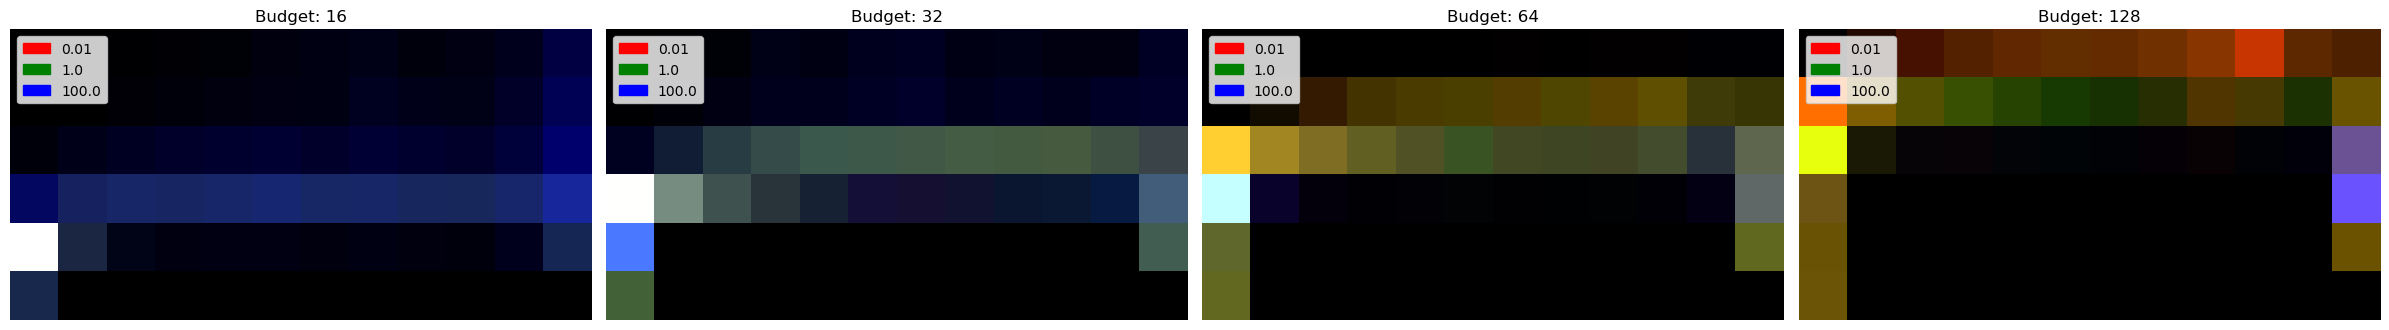

In [39]:
import matplotlib.patches as mpatches
grouped = df.groupby(['planning_budget', 'puct_c'])['trajectories'].sum()


# Determine the number of unique planning budgets
n_budgets = len(grouped.index.get_level_values(0).unique())

# Prepare a single figure with multiple subplots (one for each planning_budget)
fig, axs = plt.subplots(1, n_budgets, figsize=(6 * n_budgets, 6))

# Iterate over each planning_budget and create RGB heatmaps
for idx, (planning_budget, budget_group) in enumerate(grouped.groupby(level=0)):
    rgb_image = np.zeros((nrows, ncols, 3))  # Initialize RGB layers
    colors = ['Red', 'Green', 'Blue']  # Map trajos keys to RGB channels
    channel_colors = {name: color for name, color in zip(budget_group.index.get_level_values(1), colors)}

    # Compute density for each policy combination and assign to RGB channels
    for jdx, ((_, puct_c), trajectories) in enumerate(budget_group.items()):
        density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
        norm_density = density / np.max(density, where=(density!=0), initial=1)  # Normalize avoiding division by zero
        rgb_image[:, :, jdx % 3] += norm_density  # Accumulate in RGB layers, repeating colors if more than 3 policies

    ax = axs[idx] if n_budgets > 1 else axs
    ax.imshow(rgb_image, aspect='equal')
    ax.axis('off')  # Hide grid lines and labels

    # Create a legend
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in channel_colors.items()]
    ax.legend(handles=legend_patches, loc='upper left')
    ax.set_title(f"Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/dist_training_cliff_rgb.pdf")
plt.show()

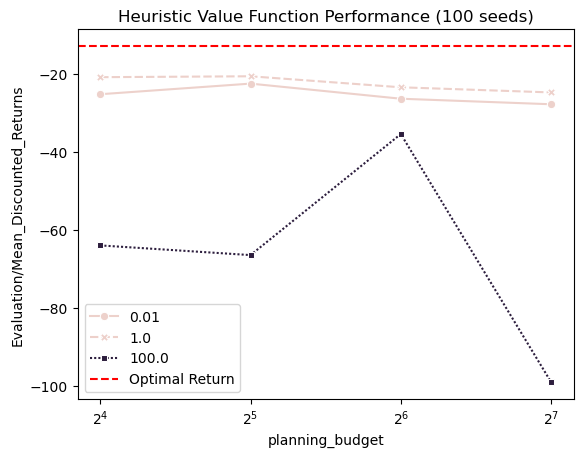

In [42]:
# plot Evaluation/Mean_Discounted_Returns from df vs planning_budget for each policy_combination

sns.lineplot(data=df, x='planning_budget', y='Evaluation/Mean_Discounted_Returns', hue='puct_c', style='puct_c', markers=True)
optimal_value = -13
plt.axhline(optimal_value, color='red', linestyle='--', label='Optimal Return')
# set x axis to log2 scale
plt.xscale('log', base=2)
plt.legend()
plt.title('Heuristic Value Function Performance (100 seeds)')
plt.savefig("outfiles/heuristic_value_function_performance.pdf")
plt.show()
